Enter input
Babylonian method


In [6]:
import matplotlib.pyplot as plt
import math, gmpy2
import numpy as np
from gmpy2 import mpz, mpfr
import gmpy2
from algorithm import *  # (the abstract base 'Algorithm' might be here if translated accordingly)
from rootequation import *  # Imports Bisection, RegulaFalsi, Newton, RootEquation


precision_digits = 100
intervals = [ ['4', '4.5'],
              ['6', '6.6'],
              ['8', '8.5'] ]

function = lambda x: x**(1/2) - 2.5  # Example function

In [7]:
bisection_solver = Bisection(function, precision_digits, intervals)
regula_falsi_solver = RegulaFalsi(function, precision_digits, intervals)
newton_solver = Newton(function, precision_digits, intervals)

bisection_solver.compute()
regula_falsi_solver.compute()
newton_solver.compute()

print("\nBisection:")
bisection_solver.print_result()

print("\nRegula Falsi:")
regula_falsi_solver.print_result()

print("\nNewton")
newton_solver.print_result()

# Example checks for consistency:
assert abs(bisection_solver.result - regula_falsi_solver.result) < 2*bisection_solver.epsilon, "Inaccurate result"
assert abs(bisection_solver.result - newton_solver.result) < 2*bisection_solver.epsilon, "Inaccurate result"


Bisection:
Result: 6.2500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 +- 1.00E-100
Estimated number of iterations: 332.0
Number of iterations: 332

Regula Falsi:
Result: 6.2500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 +- 1.00E-100
Number of iterations: 18

Newton
Result: 6.2500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
 +- 1.00E-100
Number of iterations: 7


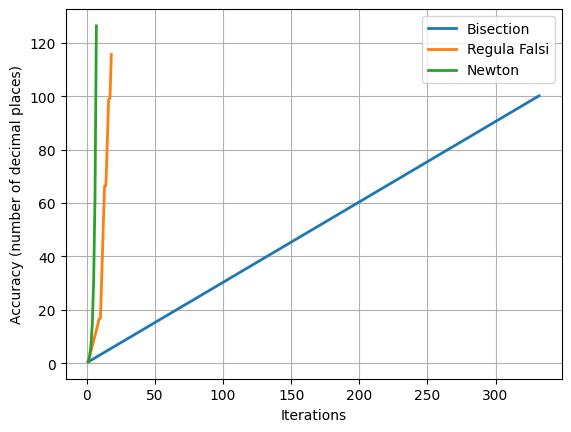

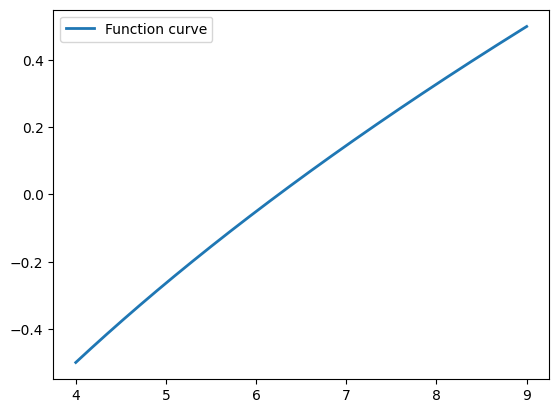

In [8]:
fig, ax = plt.subplots()

ax.plot(np.arange(1, bisection_solver.accuracy.size+1), bisection_solver.accuracy, linewidth=2.0, label="Bisection")
ax.plot(np.arange(1, regula_falsi_solver.accuracy.size+1), regula_falsi_solver.accuracy, linewidth=2.0, label="Regula Falsi")
ax.plot(np.arange(1, newton_solver.accuracy.size+1), newton_solver.accuracy, linewidth=2.0, label="Newton")

plt.xlabel('Iterations')
plt.ylabel('Accuracy (number of decimal places)')
plt.grid(True)
plt.legend()
plt.show()

# Example function plot
x_axis = np.linspace(4, 9, 1000)
y_axis = function(x_axis)

fig, ax = plt.subplots()
ax.plot(x_axis, y_axis, linewidth=2.0, label="Function curve")
plt.legend()
plt.show()